In [4]:
import os
from src.utils.utils_json import *
models = [
    "fcb_8"
]

reports = {}

for model in models:
    filename = os.path.join("reports", f"{model}.json")
    data = read_json(filename)

    if "model_name" not in data:
        data["model_name"] = model

    reports[model] = data

In [5]:
# This needs to be imported because the model uses a custom classes that need to be registered
from src.sketch_detection_rcnn.roi_heads import SketchROIHeads  # noqa # pylint: disable=unused-import
model_name = 'fcb_8'
model_meta = reports[model_name]
print(model_meta)



{'config_file': 'models/fcb_8/cfg.json', 'date': '2023-11-29 21:05:48', 'inference': {'bbox': {'AP': 85.06348550180822, 'AP-arrow': 69.57841730118957, 'AP-connection': 87.17280741845047, 'AP-data': 96.1473945080944, 'AP-decision': 88.31481901762902, 'AP-process': 77.26720525439492, 'AP-terminator': 88.19142140358073, 'AP-text': 88.77233360931832, 'AP50': 99.39220785255512, 'AP75': 97.50781431358581, 'APl': 85.77560592410734, 'APm': 70.59411363316765, 'APs': nan}}, 'metrics_file': 'models/fcb_8/metrics.json', 'model_name': 'fcb_8', 'model_path': 'models/fcb_8', 'training_data': 'datasets/fcb', 'training_time': 58.69573378562927}


In [6]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

cfg = get_cfg()
# cfg.merge_from_file(model_meta["config_file"])

# # path to the model we just trained
# cfg.MODEL.WEIGHTS = os.path.join("models", model_name, "model_final.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [7]:
from src.dataset.dataset import read_dateset_from

validation_dataset = read_dateset_from(model_meta["training_data"], "train")

In [8]:
import cv2
import torch

from typing import Tuple
from detectron2.utils.visualizer import Visualizer
from src.visualization.visualize import show_img
from src.utils.utils_bbox import bbox_iou

example_gt = validation_dataset[1]

# Set threshold for bounding box matching (IoU)
bbox_threshold = 0.5

im = cv2.imread(example_gt["file_name"])
example_prediction = predictor(im)
print(example_prediction)

/root/miniconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'instances': Instances(num_instances=26, image_height=1261, image_width=1333, fields=[pred_boxes: Boxes(tensor([[6.0788e+01, 1.1294e+03, 2.9183e+02, 1.2417e+03],
        [7.9332e+01, 8.5364e+02, 3.2041e+02, 9.6287e+02],
        [4.0981e+01, 3.9324e+01, 2.5374e+02, 1.5700e+02],
        [6.7232e+02, 8.7990e+02, 8.1814e+02, 9.6020e+02],
        [1.3925e+02, 9.5933e+02, 2.3265e+02, 1.1370e+03],
        [3.3976e+02, 8.6400e+02, 6.7189e+02, 9.5430e+02],
        [1.0543e+03, 8.9341e+02, 1.2936e+03, 9.7604e+02],
        [4.3341e+02, 8.1195e+02, 5.7069e+02, 8.9951e+02],
        [8.9699e+02, 8.3777e+02, 1.0101e+03, 9.1441e+02],
        [8.4415e+02, 8.8359e+02, 1.0662e+03, 9.5938e+02],
        [8.4477e+02, 5.5885e+02, 1.2026e+03, 8.8368e+02],
        [5.9589e+02, 5.7538e+02, 8.4471e+02, 6.6740e+02],
        [6.6518e+01, 5.4053e+02, 2.2788e+02, 6.8987e+02],
        [1.3818e+02, 1.2533e+02, 2.3178e+02, 2.8908e+02],
        [0.0000e+00, 0.0000e+00, 3.8054e+02, 1.7704e+02],
        [1.4133e+02, 3.90

Ground truth


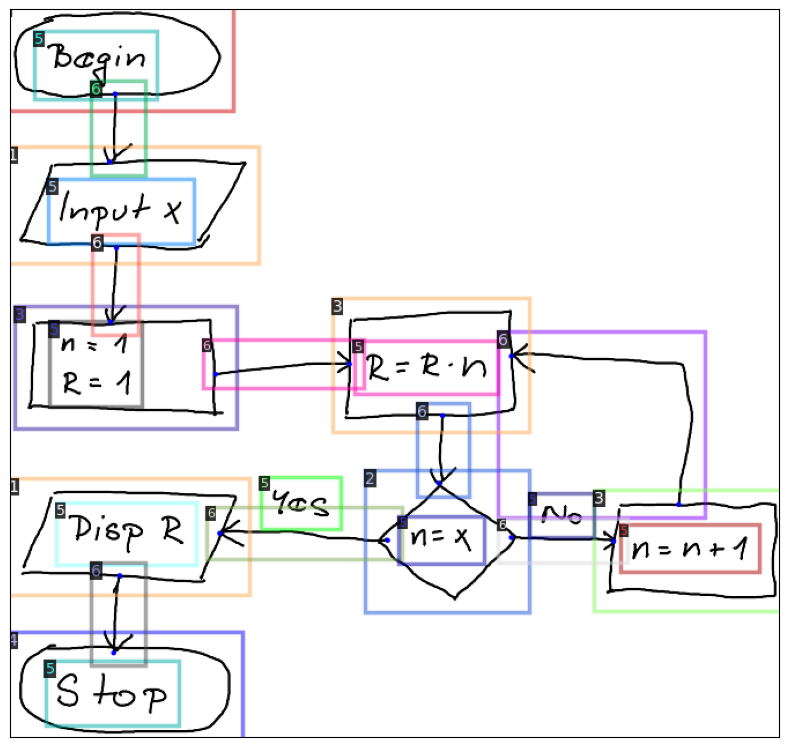

Predictions
Instances(num_instances=26, image_height=1261, image_width=1333, fields=[pred_boxes: Boxes(tensor([[6.0788e+01, 1.1294e+03, 2.9183e+02, 1.2417e+03],
        [7.9332e+01, 8.5364e+02, 3.2041e+02, 9.6287e+02],
        [4.0981e+01, 3.9324e+01, 2.5374e+02, 1.5700e+02],
        [6.7232e+02, 8.7990e+02, 8.1814e+02, 9.6020e+02],
        [1.3925e+02, 9.5933e+02, 2.3265e+02, 1.1370e+03],
        [3.3976e+02, 8.6400e+02, 6.7189e+02, 9.5430e+02],
        [1.0543e+03, 8.9341e+02, 1.2936e+03, 9.7604e+02],
        [4.3341e+02, 8.1195e+02, 5.7069e+02, 8.9951e+02],
        [8.9699e+02, 8.3777e+02, 1.0101e+03, 9.1441e+02],
        [8.4415e+02, 8.8359e+02, 1.0662e+03, 9.5938e+02],
        [8.4477e+02, 5.5885e+02, 1.2026e+03, 8.8368e+02],
        [5.9589e+02, 5.7538e+02, 8.4471e+02, 6.6740e+02],
        [6.6518e+01, 5.4053e+02, 2.2788e+02, 6.8987e+02],
        [1.3818e+02, 1.2533e+02, 2.3178e+02, 2.8908e+02],
        [0.0000e+00, 0.0000e+00, 3.8054e+02, 1.7704e+02],
        [1.4133e+02, 3.9043

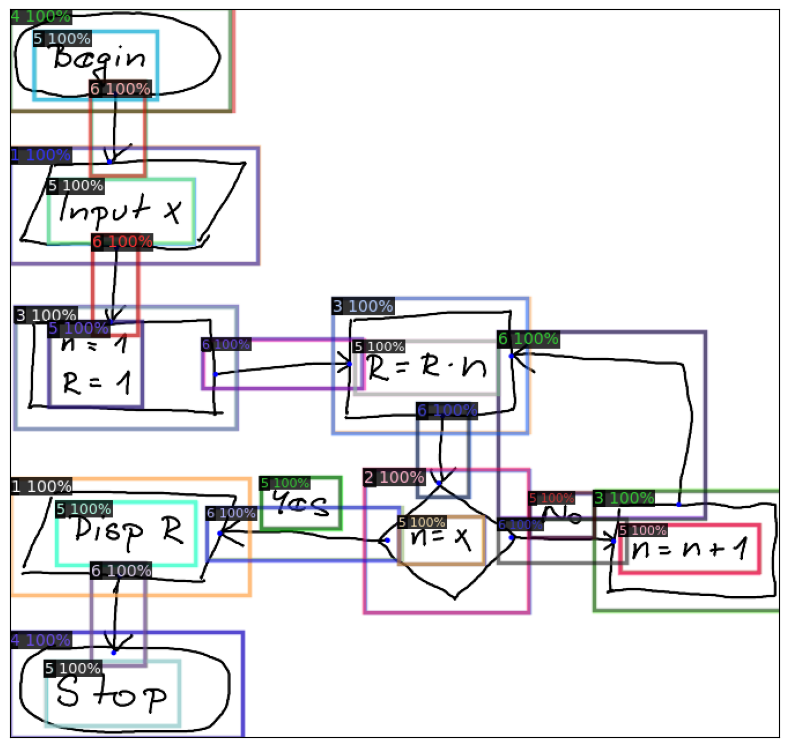

arrow_keypoints
--------------------------
bbox tensor(139.2498) tensor(959.3284) tensor(232.6548) tensor(1136.9821)
w h center_x center_y tensor(93.4049) tensor(177.6537) tensor(185.9523) tensor(1048.1553)
arrow_ab 162 966 161 992
arrow_rela tensor(-0.2475) tensor(-0.4602) tensor(-0.2662) tensor(-0.3125)
True
True
--------------------------
bbox tensor(339.7562) tensor(864.0037) tensor(671.8906) tensor(954.2952)
w h center_x center_y tensor(332.1344) tensor(90.2915) tensor(505.8234) tensor(909.1494)
arrow_ab 513 869 342 868
arrow_rela tensor(0.0240) tensor(-0.4345) tensor(-0.4910) tensor(-0.4553)
True
True
--------------------------
bbox tensor(844.1497) tensor(883.5929) tensor(1066.1594) tensor(959.3831)
w h center_x center_y tensor(222.0097) tensor(75.7902) tensor(955.1545) tensor(921.4880)
arrow_ab 841 887 884 887
arrow_rela tensor(-0.5107) tensor(-0.4499) tensor(-0.3194) tensor(-0.4486)
False
True
--------------------------
bbox tensor(844.7704) tensor(558.8510) tensor(1202.5980) 

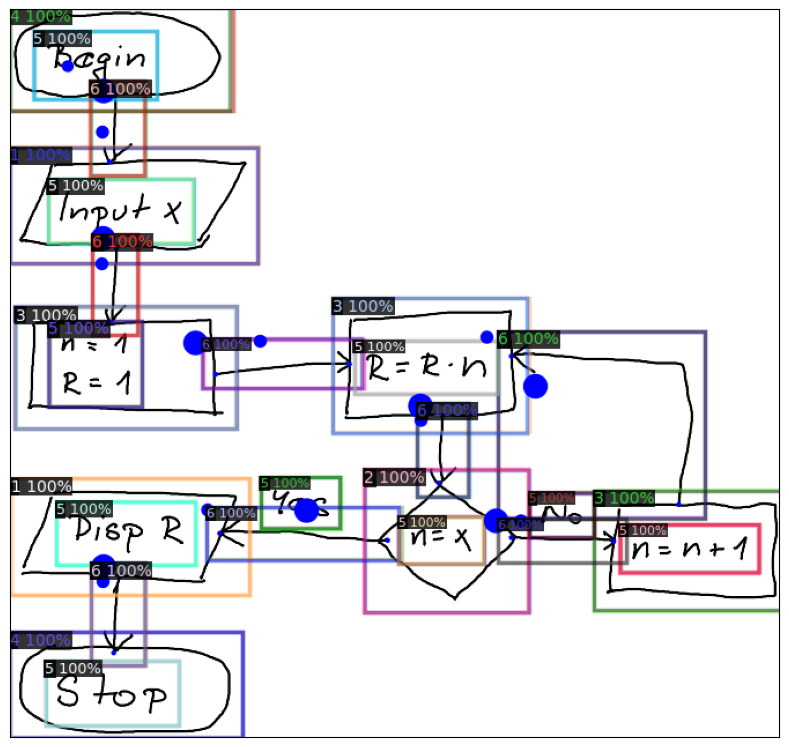

In [9]:
from pprint import pprint
# remove the colors of unsegmented pixels. This option is only available for segmentation models
visualizer = Visualizer(im, scale=0.5)

print("Ground truth")
gt_out = visualizer.draw_dataset_dict(example_gt)
show_img(gt_out.get_image())
# pprint(example_gt)

print("Predictions")
pred_out = visualizer.draw_instance_predictions(example_prediction["instances"].to("cpu"))
print(example_prediction["instances"].to("cpu"))
show_img(pred_out.get_image())

print("arrow_keypoints")
predictions = example_prediction["instances"].to("cpu")

for bbox, pred_arrow,cls in zip(predictions.pred_boxes, predictions.pred_arrow_keypoints,predictions.pred_classes):
    l_x, l_y, r_x, r_y = bbox
    s_x_r, s_y_r, e_x_r, e_y_r = pred_arrow
    if cls!=6:
        continue
    w = r_x - l_x
    h = r_y - l_y
    center_x = l_x + w / 2
    center_y = l_y + h / 2
    s_x = s_x_r * w + center_x 
    s_y = s_y_r * h + center_y 
    e_x = e_x_r * w + center_x 
    e_y = e_y_r * h + center_y 
    # 如果s_x小于0或者大于图像的宽度，那么就设置为0或者图像宽度
    def fix_coord(coord, max_coord):
        if coord < 0:
            return 0
        if coord > max_coord:
            return max_coord
        return int(coord)

    s_x = fix_coord(s_x, im.shape[1])
    s_y = fix_coord(s_y, im.shape[0])
    e_x = fix_coord(e_x, im.shape[1])
    e_y = fix_coord(e_y, im.shape[0])

    def isInbbox(x, y, bbox):
        l_x, l_y, r_x, r_y = bbox
        if x > l_x and x < r_x and y > l_y and y < r_y:
            return True
        return False
    print("--------------------------")
    print("bbox",l_x, l_y, r_x, r_y)
    print("w h center_x center_y",w,h,center_x,center_y)
    print("arrow_ab",s_x, s_y, e_x, e_y)
    print("arrow_rela",s_x_r, s_y_r, e_x_r, e_y_r)

    print(isInbbox(s_x, s_y, bbox))
    print(isInbbox(e_x, e_y, bbox))

    circle_out = visualizer.draw_circle(circle_coord = [s_x,s_y],color = '#FF0000',radius = 20)
    circle_out = visualizer.draw_circle(circle_coord = [e_x,e_y],color = '#FF0000',radius = 10)
    
    # arrow_pixel_positions.append([s_x, s_y, e_x, e_y])


circle_out = visualizer.draw_circle(circle_coord = [100,100],color = '#FF0000',radius = 9)
show_img(circle_out.get_image())


In [10]:
predictions = example_prediction["instances"].to("cpu")
print("predictions bbox:",predictions.pred_boxes)
print("predictions classes:",predictions.pred_classes)
print("predictions scores:",predictions.scores)
print("predictions pred_arrow:",predictions.pred_arrow_keypoints)

predictions bbox: Boxes(tensor([[6.0788e+01, 1.1294e+03, 2.9183e+02, 1.2417e+03],
        [7.9332e+01, 8.5364e+02, 3.2041e+02, 9.6287e+02],
        [4.0981e+01, 3.9324e+01, 2.5374e+02, 1.5700e+02],
        [6.7232e+02, 8.7990e+02, 8.1814e+02, 9.6020e+02],
        [1.3925e+02, 9.5933e+02, 2.3265e+02, 1.1370e+03],
        [3.3976e+02, 8.6400e+02, 6.7189e+02, 9.5430e+02],
        [1.0543e+03, 8.9341e+02, 1.2936e+03, 9.7604e+02],
        [4.3341e+02, 8.1195e+02, 5.7069e+02, 8.9951e+02],
        [8.9699e+02, 8.3777e+02, 1.0101e+03, 9.1441e+02],
        [8.4415e+02, 8.8359e+02, 1.0662e+03, 9.5938e+02],
        [8.4477e+02, 5.5885e+02, 1.2026e+03, 8.8368e+02],
        [5.9589e+02, 5.7538e+02, 8.4471e+02, 6.6740e+02],
        [6.6518e+01, 5.4053e+02, 2.2788e+02, 6.8987e+02],
        [1.3818e+02, 1.2533e+02, 2.3178e+02, 2.8908e+02],
        [0.0000e+00, 0.0000e+00, 3.8054e+02, 1.7704e+02],
        [1.4133e+02, 3.9043e+02, 2.2082e+02, 5.6467e+02],
        [6.5660e+01, 2.9425e+02, 3.1513e+02, 4.0

In [11]:
print("predictions pred_arrow len:",len(predictions.pred_arrow_keypoints))
print("predictions bbox len:",len(predictions.pred_boxes))

predictions pred_arrow len: 26
predictions bbox len: 26


In [12]:
arrow_pixel_positions = []
for bbox, pred_arrow in zip(predictions.pred_boxes, predictions.pred_arrow_keypoints):
    l_x, l_y, r_x, r_y = bbox
    s_x_r, s_y_r, e_x_r, e_y_r = pred_arrow

    s_x = s_x_r * (r_x - l_x) + (l_x + r_x) / 2
    s_y = s_y_r * (r_y - l_y) + (l_y + r_y) / 2
    e_x = e_x_r * (r_x - l_x) + (l_x + r_x) / 2
    e_y = e_y_r * (r_y - l_y) + (l_y + r_y) / 2

    arrow_pixel_positions.append([s_x, s_y, e_x, e_y])

arrow_pixel_positions


[[tensor(114.6909), tensor(1151.1439), tensor(110.1824), tensor(1149.8784)],
 [tensor(131.8376), tensor(876.2898), tensor(118.0066), tensor(873.2295)],
 [tensor(107.7505), tensor(70.2348), tensor(84.6625), tensor(78.5880)],
 [tensor(694.1962), tensor(893.2149), tensor(692.8350), tensor(889.9066)],
 [tensor(162.8375), tensor(966.3910), tensor(161.0906), tensor(992.6353)],
 [tensor(513.7853), tensor(869.9170), tensor(342.7325), tensor(868.0373)],
 [tensor(1127.3352), tensor(911.4467), tensor(1093.8983), tensor(913.0283)],
 [tensor(466.5887), tensor(832.9975), tensor(451.6884), tensor(829.8449)],
 [tensor(909.0654), tensor(847.7134), tensor(909.1062), tensor(846.0336)],
 [tensor(841.7737), tensor(887.3894), tensor(884.2347), tensor(887.4897)],
 [tensor(909.3994), tensor(654.6057), tensor(825.0666), tensor(569.8942)],
 [tensor(665.6517), tensor(600.2988), tensor(633.5749), tensor(598.5356)],
 [tensor(114.7415), tensor(574.8574), tensor(105.2867), tensor(573.6839)],
 [tensor(162.7295), tens

In [13]:
print(pred_out.get_image().shape)

(630, 666, 3)
